## Teste de qui-quadrado 
### Este notebook aborda a análise de tabelas de contingência e o teste de qui-quadrado 
- Uma **tabela de contingência**, também conhecida como tabela cruzada ou tabela de frequência conjunta, é uma forma de organizar dados para analisar a relação entre duas ou mais variáveis categóricas. Ela exibe a distribuição conjunta de frequências dessas variáveis, mostrando como elas se relacionam umas com as outras. Desta forma, ela é uma ferramenta estatística que exibe a distribuição conjunta de duas ou mais variáveis categóricas.
- O **teste do qui-quadrado** é uma técnica estatística usada para avaliar a associação entre duas variáveis categóricas em uma tabela de contingência. Ele testa se existe uma relação significativa entre as variáveis ou se elas são independentes uma da outra.
    - O teste calcula o qui-quadrado (χ²), que é uma medida da diferença entre as frequências observadas e as frequências esperadas sob a hipótese nula de independência. Quanto maior for o valor do qui-quadrado, maior é a evidência de que as variáveis não são independentes
    - Para realizar o teste do qui-quadrado, são definidas as seguintes hipóteses:
        - **Hipótese nula (H0):** As variáveis são independentes uma da outra.
        - **Hipótese alternativa (H1 ou HA):** As variáveis estão associadas de alguma maneira; não são independentes.
        - O teste produz um valor de p (valor-p), que é a probabilidade de observar os dados observados ou algo mais extremo, assumindo que a hipótese nula seja verdadeira. Um valor-p baixo indica que os dados observados são improváveis de ocorrer sob a hipótese nula, o que sugere que devemos rejeitar a hipótese nula em favor da hipótese alternativa.

In [1]:
library('readr')

Warning message:
"package 'readr' was built under R version 4.2.3"


In [2]:
carros <- read_csv('carros-usados.csv')
head(carros)

Rows: 150 Columns: 6
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (3): modelo, cor, transmissao
dbl (3): ano, preco, kilometragem

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ano,modelo,preco,kilometragem,cor,transmissao
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>
2011,SEL,21992,7413,Bege,AUTO
2011,SEL,20995,10926,Cinza,AUTO
2011,SEL,19995,7351,Prata,AUTO
2011,SEL,17809,11613,Cinza,AUTO
2012,SE,17500,8367,Branco,AUTO
2010,SEL,17495,25125,Prata,AUTO


Vamos utilizar a **função table** que cria tabelas de frequência ou tabelas de contingência a partir de um vetor ou de várias variáveis categóricas.

In [3]:
table(carros$cor)
prop.table(table(carros$cor))


    Azul     Bege   Branco    Cinza     Gold    Prata    Preto    Verde 
      17        3       16       16        1       32       35        5 
Vermelho 
      25 


       Azul        Bege      Branco       Cinza        Gold       Prata 
0.113333333 0.020000000 0.106666667 0.106666667 0.006666667 0.213333333 
      Preto       Verde    Vermelho 
0.233333333 0.033333333 0.166666667 

In [4]:
frequencia_cores <-data.frame(table(carros$cor)) 
frequencia_cores

Var1,Freq
<fct>,<int>
Azul,17
Bege,3
Branco,16
Cinza,16
Gold,1
Prata,32
Preto,35
Verde,5
Vermelho,25


In [5]:
frequencia_cores$Proporcao <- prop.table(frequencia_cores$Freq)
frequencia_cores

Var1,Freq,Proporcao
<fct>,<int>,<dbl>
Azul,17,0.113333333
Bege,3,0.020000000
Branco,16,0.106666667
Cinza,16,0.106666667
Gold,1,0.006666667
Prata,32,0.213333333
Preto,35,0.233333333
Verde,5,0.033333333
Vermelho,25,0.166666667


In [6]:
colnames(frequencia_cores)[1] <- 'Cores'
frequencia_cores

Cores,Freq,Proporcao
<fct>,<int>,<dbl>
Azul,17,0.113333333
Bege,3,0.020000000
Branco,16,0.106666667
Cinza,16,0.106666667
Gold,1,0.006666667
Prata,32,0.213333333
Preto,35,0.233333333
Verde,5,0.033333333
Vermelho,25,0.166666667


In [7]:
table(carros$modelo)
prop.table(table(carros$modelo))


 SE SEL SES 
 78  23  49 


       SE       SEL       SES 
0.5200000 0.1533333 0.3266667 

In [8]:
library('dplyr')

Warning message:
"package 'dplyr' was built under R version 4.2.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [9]:
frequencia_modelo <- data.frame(table(carros$modelo))
frequencia_modelo$Proporcao <- round(prop.table(frequencia_modelo$Freq), digits = 2)
colnames(frequencia_modelo)[1] <- 'Modelo'
frequencia_modelo

Modelo,Freq,Proporcao
<fct>,<int>,<dbl>
SE,78,0.52
SEL,23,0.15
SES,49,0.33


In [10]:
frequencia_transmi <- data.frame(table(carros$transmissao)) %>%
  mutate(Proporcao = round(prop.table(Freq), digits = 2)) %>%
  rename(Transmissao = Var1)
frequencia_transmi

Transmissao,Freq,Proporcao
<fct>,<int>,<dbl>
AUTO,128,0.85
MANUAL,22,0.15


In [11]:
library('gmodels')

Warning message:
"package 'gmodels' was built under R version 4.2.3"


A **função CrossTable** do pacote gmodels em R é usada para criar tabelas de contingência (tabelas cruzadas) e realizar testes estatísticos de associação entre variáveis categóricas.  

Ao criar uma tabela cruzada, as variáveis são dispostas em linhas e colunas, e as células contêm as contagens ou frequências de observações que se enquadram nas combinações específicas dessas variáveis. A tabela fornece uma visão compacta e organizada dos padrões nas categorias das variáveis, o que pode ajudar na identificação de associações ou padrões.

In [12]:
# prop.chisq = FALSE a contribuição para o qui-quadrado não será exibida na tabela.
CrossTable(x = carros$modelo, y = carros$transmissao, prop.chisq = FALSE)


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  150 

 
              | carros$transmissao 
carros$modelo |      AUTO |    MANUAL | Row Total | 
--------------|-----------|-----------|-----------|
           SE |        63 |        15 |        78 | 
              |     0.808 |     0.192 |     0.520 | 
              |     0.492 |     0.682 |           | 
              |     0.420 |     0.100 |           | 
--------------|-----------|-----------|-----------|
          SEL |        22 |         1 |        23 | 
              |     0.957 |     0.043 |     0.153 | 
              |     0.172 |     0.045 |           | 
              |     0.147 |     0.007 |           | 
--------------|-----------|-----------|-----------|
          SES |        43 |         6 |        49 | 
              |     0.878 |     0.122 |     0.327

- Contagens Absolutas (N): Mostra o número real de observações em cada célula.  

- Percentagens por Linha: Mostra a percentagem de observações em relação à soma das observações na mesma linha.  

- Percentagens por Coluna: Mostra a percentagem de observações em relação à soma das observações na mesma coluna.  

- Percentagem Geral: Mostra a percentagem de observações em relação ao total geral.  

A imagem abaixo faz um demonstrativo da tabela:

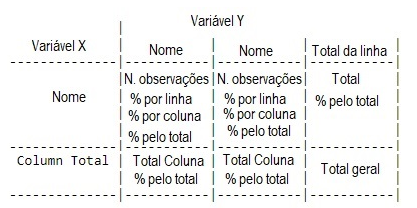

## Teste do Qui-quadrado


**O teste qui-quadrado (também conhecido como teste de qui-quadrado de independência) é uma técnica estatística usada para avaliar a associação entre duas variáveis categóricas.**

Qui Quadrado, simbolizado por χ2 é um teste de hipóteses que se destina a encontrar um valor da  dispersão para duas variáveis nominais, avaliando a associação existente entre variáveis qualitativas. É um teste não paramétrico, ou seja, não depende dos parâmetros populacionais, como média e variância.   
**O princípio básico deste método é comparar proporções, isto é, as possíveis divergências entre as frequências observadas e esperadas para um certo evento.** 

### A imagem abaixo exemplifica o calculo da frequencia esperada:

- Em uma amostra com 100 observações e 5 categorias, se não houvesse prevalência esperaríamos que cada categoria tivesse 20 observações; 
 - Esta premissa é baseada na expectativa de que, se não houver associação entre as variáveis, a proporção de observações em cada categoria seria uniforme. Ao dividir por 5, você está distribuindo igualmente as observações ao longo das categorias;
 - Elevamos ao quadrado a diferença para os resultados não se anulem(mesmo princípio do calculo da variância), em seguida dividimos pela frequencia esperada para retornarmos a unidade de medida anterior;
 
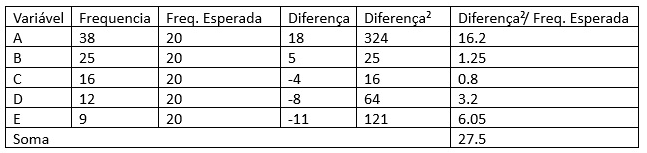

- Em sequida precisamos calcular Graus de Liberdade, representado pela equação: gl=K -1;
- Em que K se refere ao número de categorias na distribuição de frequencia observada;
- gl=5-1=4
- X² crítico = 9,488(significância = 0,05) . valor tabelado(tabela do Qui-Quadrado)

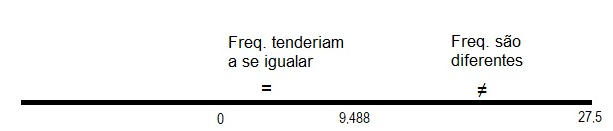

### O valor esta acima do valor crítico, portanto existe uma diferença estatisticamente significativa entre os grupos.

### Quando temos uma tabela de contigência com duas colunas ou mais o calculo da frequencia esperada é um pouco diferente:  
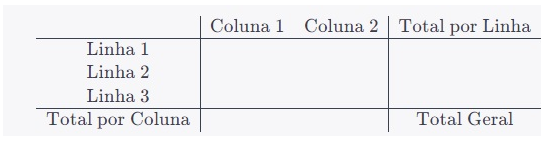

- E= (Total na linha) * (Total na Coluna) / Total Geral da Tabela

Ex.: Para primeira observação temos: (78*128)/150= 66,56

**Abaixo está o restante do cálculo:**

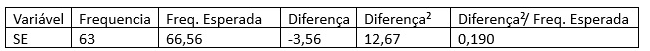

- Obs.: Ao setarmos prop.chisq = TRUE, o R ja calcula isto automaticamente:

In [13]:
CrossTable(x = carros$modelo, y = carros$transmissao, prop.chisq = TRUE, chisq = TRUE)

Warning message in chisq.test(t, correct = FALSE, ...):
"Aproximação do qui-quadrado pode estar incorreta"



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  150 

 
              | carros$transmissao 
carros$modelo |      AUTO |    MANUAL | Row Total | 
--------------|-----------|-----------|-----------|
           SE |        63 |        15 |        78 | 
              |     0.190 |     1.108 |           | 
              |     0.808 |     0.192 |     0.520 | 
              |     0.492 |     0.682 |           | 
              |     0.420 |     0.100 |           | 
--------------|-----------|-----------|-----------|
          SEL |        22 |         1 |        23 | 
              |     0.287 |     1.670 |           | 
              |     0.957 |     0.043 |     0.153 | 
              |     0.172 |     0.045 |           | 
              |     0.147 |     0.007 |           | 
--------------|-----

In [14]:
chisq.test(x = carros$modelo, y = carros$transmissao)

Warning message in chisq.test(x = carros$modelo, y = carros$transmissao):
"Aproximação do qui-quadrado pode estar incorreta"



	Pearson's Chi-squared test

data:  carros$modelo and carros$transmissao
X-squared = 3.4846, df = 2, p-value = 0.1751


No contexto do teste do qui-quadrado, **a hipótese nula (H0)** afirma que não há associação entre as variáveis categóricas em estudo. Em outras palavras, a distribuição das categorias em uma variável não é influenciada pela distribuição da outra variável; são independentes.
**A hipótese alternativa (H1/ HA)** contradiz isso e sugere que há alguma associação ou dependência entre as variáveis categóricas.

- A hipótese nula no teste do qui-quadrado afirma que não há diferença significativa entre as frequências observadas e esperadas, o que, por sua vez, sugere que as variáveis são independentes.
- HA: Há uma diferença significativa entre as frequências observadas e esperadas,ou seja, as variáveis não são independentes, há associação.

Portanto, ao realizarmos o teste do qui-quadrado para independência, **estamos avaliando se as diferenças entre as frequências observadas e esperadas são grandes o suficiente para sugerir que** as variáveis não são independentes, ou seja, **há uma associação significativa entre elas**. (   
Se as frequências observadas e esperadas são consistentes(não há diferença significativa), isso apoia a ideia de que as variáveis são independentes. 


### Neste caso, o valor do Chi = 3.47, graus de liberdade (df) = 2;
### Valor do Chi menor que X² crítico para 2 graus de liberdade (5,991)
### O valor alto do p-value confirma esta conclusão (maior que 0,05)
### Portanto, não há associação entre os grupos

## Para exemplificar melhor vamos considerar um exemplo hipotético para ilustrar isso. Suponha que estamos estudando a relação entre o gênero (Masculino/Feminino) e a preferência por três tipos de bebida (Café/Chá/Suco). Aqui está uma tabela de contingência hipotética:

In [15]:
#vamos criar uma proporção primeiramente que haja preferencia por bebidas dependendo do genêro.
bebidas <- data.frame(
  Genero = c("Masculino", "Feminino"),
  Cafe = c(110, 40),
  Cha = c(50, 100),
    Suco =c(60,90)
)
bebidas

Genero,Cafe,Cha,Suco
<chr>,<dbl>,<dbl>,<dbl>
Masculino,110,50,60
Feminino,40,100,90


In [16]:
# Adicionando totais da coluna cafe, cha e suco à uma variável.
soma_linha <-apply(bebidas[2:4],1,sum)
soma_linha

[1] 220 230

In [17]:
bebidas1<- cbind(bebidas,soma_linha) 
bebidas1

Genero,Cafe,Cha,Suco,soma_linha
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Masculino,110,50,60,220
Feminino,40,100,90,230


In [18]:
soma_coluna <- apply(bebidas1[2:5], 2, sum)
soma_coluna

Cafe        Cha       Suco soma_linha 
       150        150        150        450

In [19]:
# Criar um novo data frame com a soma das colunas
nova_linha <- c('Total_coluna', soma_coluna)
bebidas2 <- rbind(bebidas1, nova_linha)
bebidas2

Genero,Cafe,Cha,Suco,soma_linha
<chr>,<chr>,<chr>,<chr>,<chr>
Masculino,110,50,60,220
Feminino,40,100,90,230
Total_coluna,150,150,150,450


In [20]:
#Visão geral da tabela de contigência
colnames(bebidas2)[5] <- 'Total_linha'
bebidas2

Genero,Cafe,Cha,Suco,Total_linha
<chr>,<chr>,<chr>,<chr>,<chr>
Masculino,110,50,60,220
Feminino,40,100,90,230
Total_coluna,150,150,150,450


In [21]:
#Agora usamos a função gather do pacote Tidyr para transformar os dados
library(tidyr)

Warning message:
"package 'tidyr' was built under R version 4.2.3"


In [22]:
bebidas_dados <- gather(bebidas, key = 'Bebidas', value = 'Quantidade', Cafe:Suco, -Genero)

In [23]:
bebidas_dados

Genero,Bebidas,Quantidade
<chr>,<chr>,<dbl>
Masculino,Cafe,110
Feminino,Cafe,40
Masculino,Cha,50
Feminino,Cha,100
Masculino,Suco,60
Feminino,Suco,90


In [24]:
# Versão extendida do dataframe onde as linhas foram replicadas de acordo com a quantidade especificada em cada observação.
dados_expandidos <- bebidas_dados %>%
  group_by(Genero, Bebidas) %>%
  slice(rep(1:n(), each = Quantidade)) %>%
  ungroup() %>%
  select(-Quantidade)

In [25]:
head(dados_expandidos)

Genero,Bebidas
<chr>,<chr>
Feminino,Cafe
Feminino,Cafe
Feminino,Cafe
Feminino,Cafe
Feminino,Cafe
Feminino,Cafe


In [26]:
CrossTable(x = dados_expandidos$Genero, y = dados_expandidos$Bebidas, prop.chisq = TRUE, chisq = TRUE)


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  450 

 
                        | dados_expandidos$Bebidas 
dados_expandidos$Genero |      Cafe |       Cha |      Suco | Row Total | 
------------------------|-----------|-----------|-----------|-----------|
               Feminino |        40 |       100 |        90 |       230 | 
                        |    17.536 |     7.101 |     2.319 |           | 
                        |     0.174 |     0.435 |     0.391 |     0.511 | 
                        |     0.267 |     0.667 |     0.600 |           | 
                        |     0.089 |     0.222 |     0.200 |           | 
------------------------|-----------|-----------|-----------|-----------|
              Masculino |       110 |        50 |        60 |       220 | 
                  

### Neste caso, claramente as variáveis são dependentes.  Isso significa que a preferência por café, chá ou suco está relacionada ao gênero. Verificamos que há uma grande discrepância entre as frequências observadas e esperadas em uma ou mais células, isso sugere que as variáveis não são independentes, e pode indicar uma associação entre elas

### Já sob independência, você esperaria ver um número semelhante de observações em cada célula da tabela de contingência,  a distribuição conjunta das categorias deve ser relativamente uniforme em toda a tabela. Isso nos informaria que preferência por café, chá ou suco não está relacionada ao gênero. Se as variáveis são independentes, você esperaria que cada célula tivesse um valor próximo ao esperado.

### Agora vamos gerar outra tabela com valores com uma distribuição mais uniforme:

In [27]:
bebidas <- data.frame(
  Genero = c("Masculino", "Feminino"),
  Cafe = c(75, 82),
  Cha = c(80, 70),
    Suco =c(75,78)
)
bebidas

Genero,Cafe,Cha,Suco
<chr>,<dbl>,<dbl>,<dbl>
Masculino,75,80,75
Feminino,82,70,78


In [28]:
bebidas_dados <- gather(bebidas, key = 'Bebidas', value = 'Quantidade', Cafe:Suco, -Genero)

In [29]:
dados_expandidos <- bebidas_dados %>%
  group_by(Genero, Bebidas) %>%
  slice(rep(1:n(), each = Quantidade)) %>%
  ungroup() %>%
  select(-Quantidade)

In [30]:
CrossTable(x = dados_expandidos$Genero, y = dados_expandidos$Bebidas, prop.chisq = TRUE, chisq = TRUE)


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  460 

 
                        | dados_expandidos$Bebidas 
dados_expandidos$Genero |      Cafe |       Cha |      Suco | Row Total | 
------------------------|-----------|-----------|-----------|-----------|
               Feminino |        82 |        70 |        78 |       230 | 
                        |     0.156 |     0.333 |     0.029 |           | 
                        |     0.357 |     0.304 |     0.339 |     0.500 | 
                        |     0.522 |     0.467 |     0.510 |           | 
                        |     0.178 |     0.152 |     0.170 |           | 
------------------------|-----------|-----------|-----------|-----------|
              Masculino |        75 |        80 |        75 |       230 | 
                  